In [1]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import Counter
import cv2
from tqdm import tqdm

In [ ]:
# Распределение продолжительности роликов (до / после)
# Распределение меток классов (до / после)

# Время получения ембедингов V

# Процесс обучения модели V
## F1 по каждому классу
## Общая AUC и Accuracy

# classifiaction report V
 
# Классификация роликов V
# Время классификации

In [2]:
FIXED_VIDEOS_DIR = '/home/dzigen/Desktop/ITMO/sem1/DLtech/dl_tech_learn/lab2/fixed_videos'
test_vid_df = pd.read_csv("video_label_predictions.csv", sep=';')
LABELS = os.listdir(FIXED_VIDEOS_DIR)
vidcls_loadtime = []
for i in range(test_vid_df.shape[0]):
    cur_link, cur_label = test_vid_df['links'][i], test_vid_df['refs'][i]
    elapsed_time = test_vid_df['elapsed_time (sec)'][i]
    vidcap = cv2.VideoCapture(f"{FIXED_VIDEOS_DIR}/{cur_label}/{cur_link}")
    frames_amount = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    vidcls_loadtime.append((elapsed_time, frames_amount))

sorted_vidcls_loadtime = sorted(vidcls_loadtime, key=lambda v: v[1])

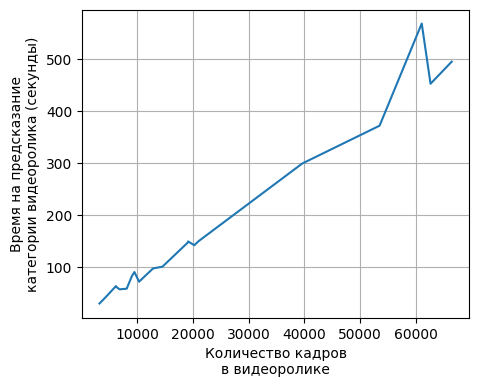

In [20]:
plt.figure(figsize=(5,4))
x, y = list(map(lambda v: v[1], sorted_vidcls_loadtime)), list(map(lambda v: v[0], sorted_vidcls_loadtime))
plt.plot(x,y)
plt.xlabel("Количеcтво кадров\nв видеоролике")
plt.ylabel("Время на предсказание\nкатегории видеоролика (секунды)")
plt.grid()
plt.show()

In [2]:
RAW_VIDEO_DIR = '/home/dzigen/Desktop/ITMO/sem1/DLtech/dl_tech_learn/lab2/raw_videos'
LABELS = os.listdir(RAW_VIDEO_DIR)
for label in LABELS:
    print(label, len(os.listdir(f"{RAW_VIDEO_DIR}/{label}")))

travel 340
history 275
food 389
art_music 247


In [12]:
video_df = pd.read_csv("./videos_dataset.csv", sep=';')
print(Counter(video_df['category']))

Counter({'food': 385, 'travel': 337, 'history': 275, 'art_music': 173})


In [13]:
FIXED_VIDEO_DIR = '/home/dzigen/Desktop/ITMO/sem1/DLtech/dl_tech_learn/lab2/fixed_videos'

In [14]:
frames_len = {label: [] for label in LABELS}
for i in tqdm(range(video_df.shape[0])):
    cur_label = video_df['category'][i]
    cur_link = video_df['links'][i]
    vidcap = cv2.VideoCapture(f"{FIXED_VIDEO_DIR}/{cur_label}/{cur_link}")
    frames_amount = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_len[cur_label].append(frames_amount)

100%|██████████| 1170/1170 [00:32<00:00, 35.48it/s]


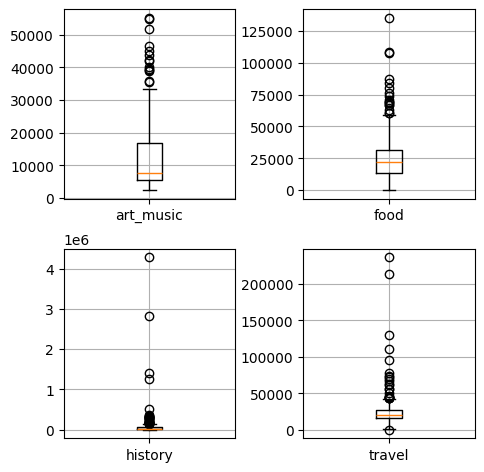

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
#fig.suptitle('Распределение количества ')
fig.tight_layout(pad=1.5)
axs[0,0].boxplot(frames_len['art_music'])
axs[0,0].set_xticklabels(['art_music'])
axs[0,0].grid()
axs[0,1].boxplot(frames_len['food'])
axs[0,1].set_xticklabels(['food'])
axs[0,1].grid()
axs[1,0].boxplot(frames_len['history'])
axs[1,0].set_xticklabels(['history'])
axs[1,0].grid()
axs[1,1].boxplot(frames_len['travel'])
axs[1,1].set_xticklabels(['travel'])
axs[1,1].grid()
plt.show()
#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

#for ax in axs.flat:
#    ax.label_outer()

In [38]:
FRAMES_DIR = '/home/dzigen/Desktop/ITMO/sem1/DLtech/dl_tech_learn/lab2/frames'
LABELS = os.listdir(FRAMES_DIR)
for label in LABELS:
    print(label, len(os.listdir(f"{FRAMES_DIR}/{label}")))

travel 16309
history 23975
food 18874
art_music 21268


In [36]:
# Getting embeddings time
#=========================
# history: 26:44 min
# food: 21:18 min
# art_music: 24:12 min
# travel: 19:53 min

In [17]:
with open("evl_metrics.json", 'r', encoding='utf-8') as fd:
    train_metrics = json.loads(fd.read())

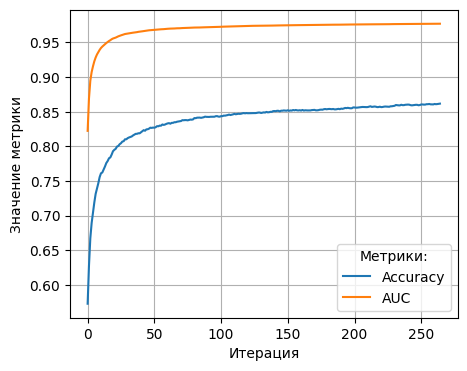

In [18]:
plt.figure(figsize=(5,4))

acc_vals = train_metrics['Accuracy']
auc_vals = train_metrics['AUC:type=Mu']

x_acc = list(range(len(acc_vals)))
x_auc = list(range(len(auc_vals)))

#plt.title("Качество модели\nв процессе обучения")
plt.xlabel("Итерация")
plt.ylabel("Значение метрики")

plt.plot(x_acc, acc_vals, label='Accuracy')
plt.plot(x_auc, auc_vals, label='AUC')
plt.legend(title='Метрики:')
plt.grid()
plt.show()

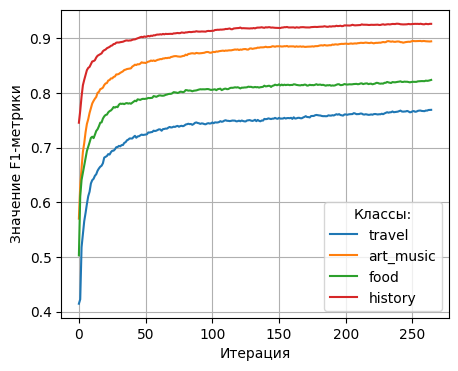

In [19]:
plt.figure(figsize=(5,4))

LABELS = ['travel','art_music','food','history']
ID2LABEL = {i:v for i, v in enumerate(LABELS)}

for m_name in ['F1:class=0', 'F1:class=1', 'F1:class=2', 'F1:class=3']:
    y = train_metrics[m_name]
    x = list(range(len(y)))
    plt.plot(x, y, label=ID2LABEL[int(m_name.split('=')[1])])

#plt.title("Качество предсказания меток\nв процессе обучения")
plt.xlabel("Итерация")
plt.ylabel("Значение F1-метрики")
plt.legend(title='Классы:')
plt.grid()
plt.show()

In [35]:
# Frame classification:
#=====================================================
#              precision    recall  f1-score   support
#
#      travel       0.76      0.78      0.77      3262
#   art_music       0.89      0.90      0.89      4254
#        food       0.83      0.81      0.82      3775
#     history       0.93      0.92      0.93      4795
#
#    accuracy                           0.86     16086
#   macro avg       0.85      0.85      0.85     16086
#weighted avg       0.86      0.86      0.86     16086

In [ ]:
# Video classification:
#=====================================================
#              precision    recall  f1-score   support
#
#      travel       1.00      1.00      1.00         5
#   art_music       1.00      1.00      1.00         5
#        food       1.00      1.00      1.00         5
#     history       1.00      1.00      1.00         5
#
#    accuracy                           1.00        20
#   macro avg       1.00      1.00      1.00        20
#weighted avg       1.00      1.00      1.00        20